<a href="https://colab.research.google.com/github/Andorfim/NanostructurePhysics/blob/main/Lab2_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

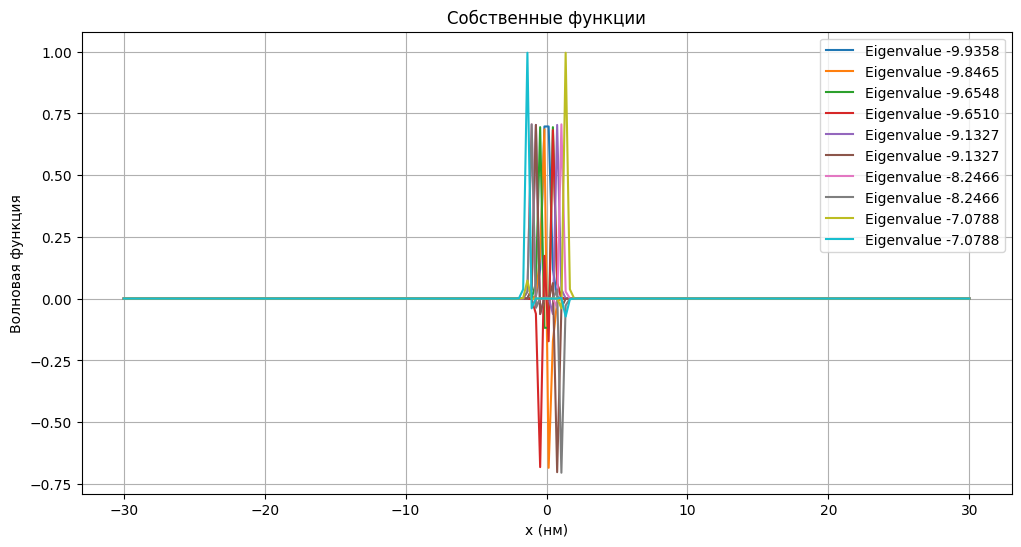

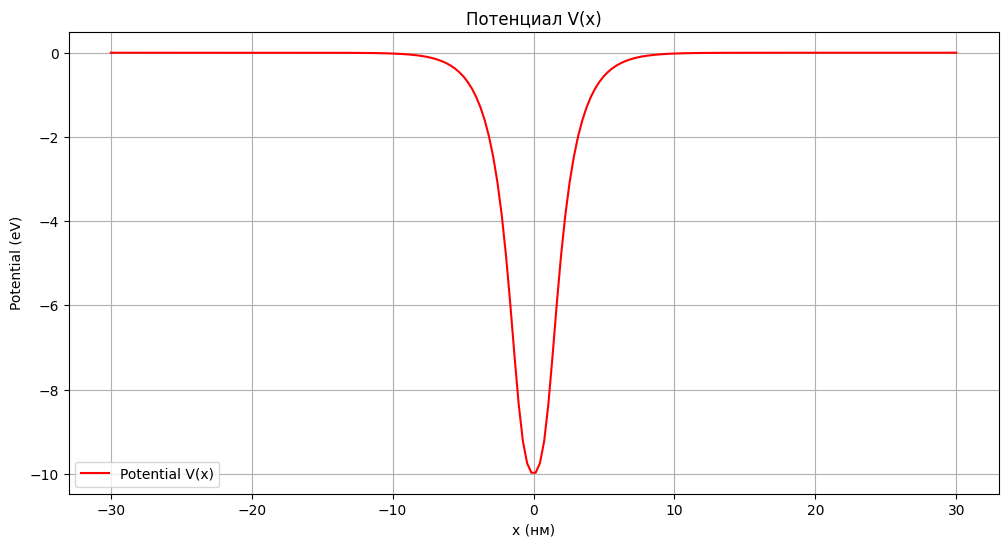

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from scipy.linalg import eigh

# Функция для нахождения значения y при заданном x
def equation_for_y(y, x_val):
    return y**5 + y + np.tanh(x_val)

# Функция для численного нахождения корня уравнения y^5 + y + tanh(x) = 0
def find_y_root_scalar(x_val):
    sol = root_scalar(equation_for_y, args=(x_val,), bracket=[-3, 3], method='brentq')
    return sol.root

# Функция для вычисления производной y'
def derivative_of_y(x_val):
    y_val = find_y_root_scalar(x_val)
    return (np.tanh(x_val)**2 - 1)  /  (1 + 5 * y_val**4)

# Параметры
V0 = 10  # эВ
L = 3  # нм
N = 200
x_min = -10 * L
x_max = 10 * L
dx = (x_max - x_min) / (N - 1)
x_vals = np.linspace(x_min, x_max, N)
C = 0.0381  # эВ*нм^2

# Расчет потенциала Vi на основе производной y'(x/L)
V = np.array([V0 * derivative_of_y(x/L) for x in x_vals])

# Создание матрицы Mij и Гамильтона Hij
M = np.zeros((N, N))
np.fill_diagonal(M[1:], 1)
np.fill_diagonal(M[:, 1:], 1)
np.fill_diagonal(M, -2)
H = (-C / (L**2 * dx**2)) * M + np.diag(V)

# Нахождение собственных значений и векторов
eigenvalues, eigenvectors = eigh(H)

# Нормализация собственных векторов
eigenvectors = eigenvectors / np.sqrt(np.sum(eigenvectors**2, axis=0))

# Отображение собственных функций
plt.figure(figsize=(12, 6))
for i in range(min(10, len(eigenvalues))):  # Ограничение количества отображаемых функций
    if eigenvalues[i] < V0:  # Условие на значение энергии
        plt.plot(x_vals, eigenvectors[:, i], label=f'Eigenvalue {eigenvalues[i]:.4f}')
plt.legend()
plt.title('Собственные функции')
plt.xlabel('x (нм)')
plt.ylabel('Волновая функция')
plt.grid(True)
plt.show()

# Отображение потенциала
plt.figure(figsize=(12, 6))
plt.plot(x_vals, V, label='Potential V(x)', color='red')
plt.title('Потенциал V(x)')
plt.xlabel('x (нм)')
plt.ylabel('Potential (eV)')
plt.grid(True)
plt.legend()
plt.show()
